<a href="https://colab.research.google.com/github/sunandhini96/School_of_AI-S4_Assignment/blob/main/S3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing all packages
from __future__ import print_function #"print_function" is a statement in Python that is used to specify that the version of the print function being used should be the one defined in Python 3.x, rather than the one that is used in Python 2.x. 
import torch #Torch is a open-source machine learning library, a scientific computing framework, and a script language based on the Lua programming language. It provides a wide range of algorithms for deep learning and is used primarily for computer vision and natural language processing tasks.
import torch.nn as nn # torch.nn is a module within the PyTorch library that provides a set of classes and functions for building and training neural networks. It is a high-level API for building and training neural networks, and it is built on top of the lower-level torch.nn.functional module.
#The main feature of torch.nn is the nn.Module class, which provides a convenient way to define and organize the layers of a neural network. The nn.Module class is the base class for all neural network modules in PyTorch, and it provides a number of useful methods and attributes for building and training neural networks.
import torch.nn.functional as F
import torch.optim as optim #torch.optim is a module within the PyTorch library that provides a set of optimization algorithms for updating the parameters of neural networks. It is used to optimize the weights and biases of the neural network in order to minimize the loss function.
from torchvision import datasets, transforms #importing datasets from torchvision
import torchvision
import numpy as np
import torch 
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import grad
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

##Load the data

In [9]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [10]:
batch = next(iter(train_loader))

len(batch), type(batch)

(2, list)

In [11]:
images, labels = batch

In [12]:
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

labels: tensor([4, 8, 8, 6, 7, 1, 0, 7, 1, 8, 7, 6, 4, 9, 1, 5, 3, 2, 6, 8, 8, 6, 9, 4,
        6, 0, 4, 2, 6, 7, 0, 5, 8, 6, 0, 3, 5, 7, 4, 7, 5, 1, 6, 7, 3, 6, 0, 3,
        1, 1, 2, 6, 7, 9, 8, 0, 7, 2, 4, 3, 6, 5, 9, 5, 2, 3, 5, 3, 5, 8, 9, 2,
        7, 1, 2, 4, 0, 2, 0, 6, 7, 2, 9, 5, 7, 1, 2, 2, 3, 3, 8, 8, 1, 0, 5, 7,
        5, 9, 6, 7, 2, 5, 9, 7, 5, 7, 1, 7, 8, 7, 8, 8, 8, 2, 1, 4, 1, 1, 3, 2,
        9, 5, 1, 9, 0, 3, 0, 3])


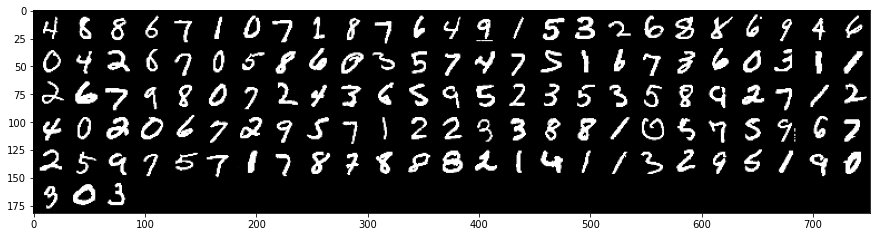

In [13]:
grid = torchvision.utils.make_grid(images, nrow=25)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

##Network

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.2)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32,64 , 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.2)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.2)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(64, 10)
        )
                
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = F.log_softmax(x, dim=1)
        return x


In [21]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
       BatchNorm2d-3           [-1, 32, 28, 28]              64
         MaxPool2d-4           [-1, 32, 14, 14]               0
           Dropout-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 32, 14, 14]           9,248
              ReLU-7           [-1, 32, 14, 14]               0
            Conv2d-8             [-1, 64, 7, 7]          18,496
              ReLU-9             [-1, 64, 7, 7]               0
      BatchNorm2d-10             [-1, 64, 7, 7]             128
        MaxPool2d-11             [-1, 64, 3, 3]               0
          Dropout-12             [-1, 64, 3, 3]               0
    

In [22]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [24]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 15):
    print("epoch",epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

epoch 1


loss=0.12908615171909332 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.78it/s]



Test set: Average loss: 0.0548, Accuracy: 9829/10000 (98%)

epoch 2


loss=0.06388013064861298 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.25it/s]



Test set: Average loss: 0.0359, Accuracy: 9886/10000 (99%)

epoch 3


loss=0.13491269946098328 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.53it/s]



Test set: Average loss: 0.0280, Accuracy: 9914/10000 (99%)

epoch 4


loss=0.08578970283269882 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.86it/s]



Test set: Average loss: 0.0259, Accuracy: 9916/10000 (99%)

epoch 5


loss=0.007692589890211821 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.63it/s]



Test set: Average loss: 0.0255, Accuracy: 9913/10000 (99%)

epoch 6


loss=0.00862020906060934 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.42it/s]



Test set: Average loss: 0.0250, Accuracy: 9920/10000 (99%)

epoch 7


loss=0.02273480035364628 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.58it/s]



Test set: Average loss: 0.0209, Accuracy: 9926/10000 (99%)

epoch 8


loss=0.012130733579397202 batch_id=468: 100%|██████████| 469/469 [00:17<00:00, 27.56it/s]



Test set: Average loss: 0.0215, Accuracy: 9927/10000 (99%)

epoch 9


loss=0.08828762918710709 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.38it/s]



Test set: Average loss: 0.0213, Accuracy: 9928/10000 (99%)

epoch 10


loss=0.10299462080001831 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.96it/s]



Test set: Average loss: 0.0208, Accuracy: 9930/10000 (99%)

epoch 11


loss=0.029788658022880554 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.59it/s]



Test set: Average loss: 0.0205, Accuracy: 9936/10000 (99%)

epoch 12


loss=0.027940796688199043 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.71it/s]



Test set: Average loss: 0.0201, Accuracy: 9931/10000 (99%)

epoch 13


loss=0.0059721823781728745 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.88it/s]



Test set: Average loss: 0.0219, Accuracy: 9927/10000 (99%)

epoch 14


loss=0.013995575718581676 batch_id=468: 100%|██████████| 469/469 [00:15<00:00, 30.52it/s]



Test set: Average loss: 0.0194, Accuracy: 9935/10000 (99%)

